000000476796.jpg


/tmp/ipykernel_2363936/2787192889.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(polygon[i], polygon[i+1], 'ro', markersize=3, color='red')


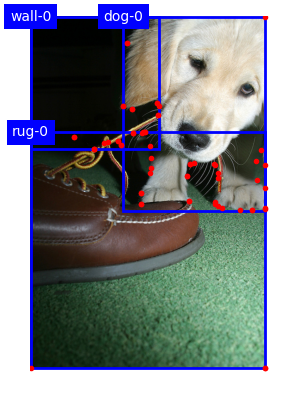

000000007596.jpg


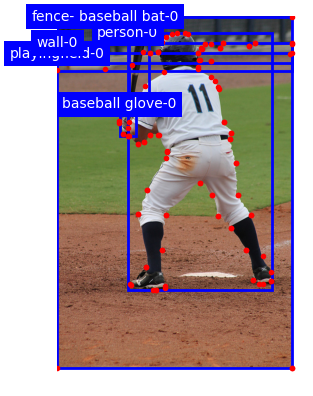

000000487693.jpg


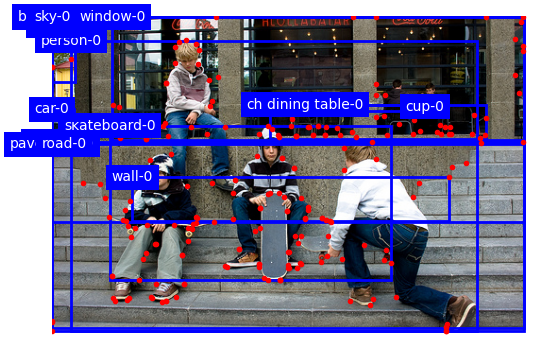

000000006632.jpg


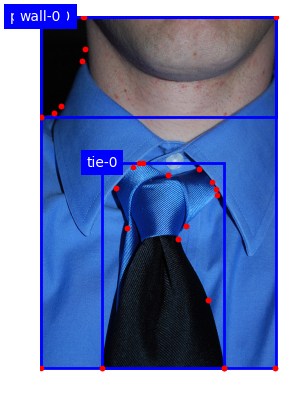

000000318937.jpg


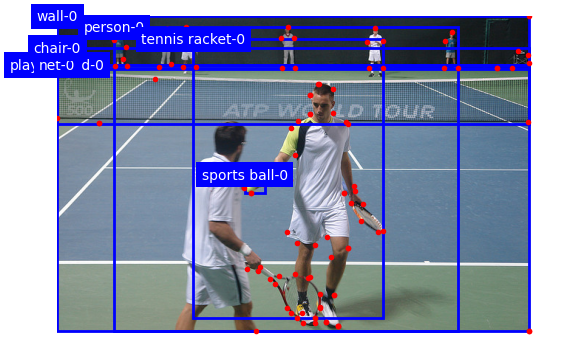

000000573518.jpg


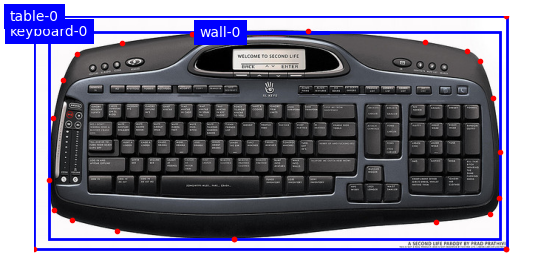

000000395822.jpg


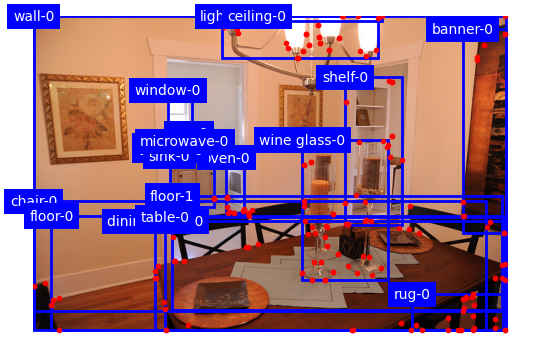

000000129739.jpg


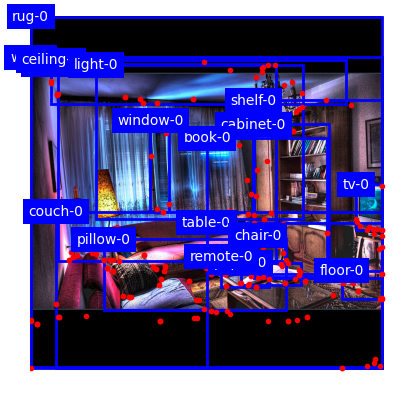

000000314607.jpg


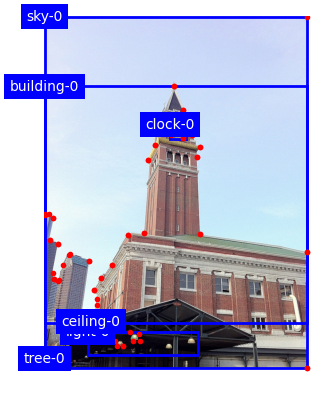

000000487260.jpg


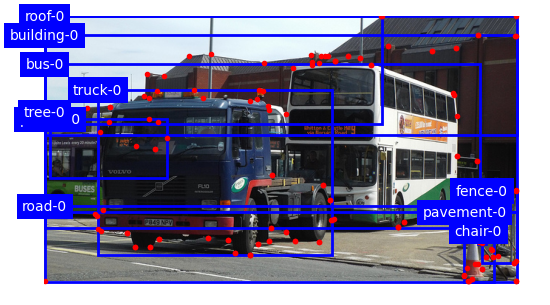

: 

In [21]:
import json
import os
import matplotlib.pyplot as plt
from PIL import Image
import pycocotools.mask as mask_util

image_dir = 'playground/data/coco/train2017'
json_file = json.load(open('playground/data/coco_segm_text/train/semantic.json'))


def bbox_to_rect(bbox, color):
    # 将边界框(左上x, 左上y, 右下x, 右下y)格式转换成matplotlib格式：
    # ((左上x, 左上y), 宽, 高)
    return plt.Rectangle(xy=(bbox[0], bbox[1]), width=bbox[2], height=bbox[3], fill=False, edgecolor=color, linewidth=2)

for key in list(json_file.keys())[:10]:
    print(key)

    image_file = os.path.join(image_dir, key)
    img = Image.open(image_file)
    fig = plt.imshow(img)
    seg = json_file[key]
    number = {}
    for seg in seg:
        bbox = seg['bbox']
        category = seg['category']
        mask = seg['rle']
        mask = mask_util.decode(mask)
        if category not in number:
            number[category] = -1
        number[category] += 1
        # draw box with category name , name不要写在图像外面
        fig.axes.add_patch(bbox_to_rect(bbox,'blue'))
        fig.axes.text(bbox_to_rect(bbox,'blue').xy[0],bbox_to_rect(bbox,'blue').xy[1],category + f"-{number[category]}",va='center', ha='center', fontsize=10, color='white',
                      bbox=dict(facecolor='blue', lw=0))

        # draw polygon points
        polygon = seg['mask']["segmentation"]
        if len(polygon) == 1:
            polygon = polygon[0]
        for i in range(0, len(polygon), 2):
            plt.plot(polygon[i], polygon[i+1], 'ro', markersize=3, color='red')

    plt.axis('off')
    # plt.savefig('instance.png')
    plt.show()


    

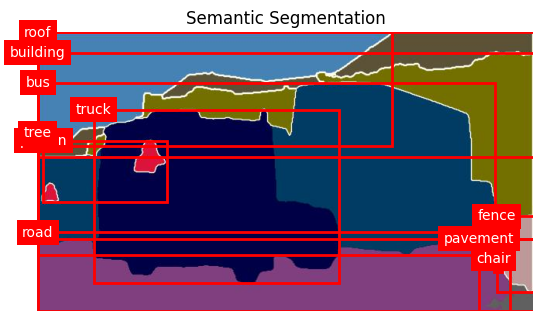

In [4]:
for key in list(pano_json.keys())[9:10]:
    img = Image.open(os.path.join('playground/data/coco/train2017', key))
    fig = plt.imshow(img)
    segm_seg = segm_json[key]
    for seg in segm_seg:
        bbox = seg['bbox']
        category = seg['category']
        # draw box with category 
        fig.axes.add_patch(bbox_to_rect(bbox,'red'))
        fig.axes.text(bbox_to_rect(bbox,'red').xy[0],bbox_to_rect(bbox,'red').xy[1],category,va='center', ha='center', fontsize=10, color='white',
                      bbox=dict(facecolor='red', lw=0))
    plt.title('Semantic Segmentation')
    plt.axis('off')
    plt.savefig('semantic.png')


    

000000476796.jpg
000000007596.jpg
000000487693.jpg
000000006632.jpg
000000318937.jpg
000000573518.jpg
000000395822.jpg
000000129739.jpg
000000314607.jpg
000000487260.jpg
000000228919.jpg
000000388279.jpg
000000232483.jpg
000000367853.jpg
000000107009.jpg
000000410482.jpg
000000037343.jpg
000000451381.jpg
000000384635.jpg
000000460885.jpg
000000301644.jpg
000000274130.jpg
000000014337.jpg
000000161686.jpg
000000158353.jpg
000000381036.jpg
000000359066.jpg
000000491228.jpg
000000260512.jpg
000000523405.jpg
000000039864.jpg
000000396625.jpg
000000023084.jpg
000000107052.jpg
000000371280.jpg
000000500818.jpg
000000566448.jpg
000000306789.jpg
000000215003.jpg
000000564271.jpg
000000042680.jpg
000000416651.jpg
{'depth': 0.3216, 'category': 'sports ball', 'bbox': [507, 455, 59, 56], 'is_thing': 0}
{'depth': 0.3882, 'category': 'person', 'bbox': [313, 315, 136, 208], 'is_thing': 0}
{'depth': 0.4745, 'category': 'sports ball', 'bbox': [617, 423, 23, 50], 'is_thing': 0}
{'depth': 0.6118, 'catego

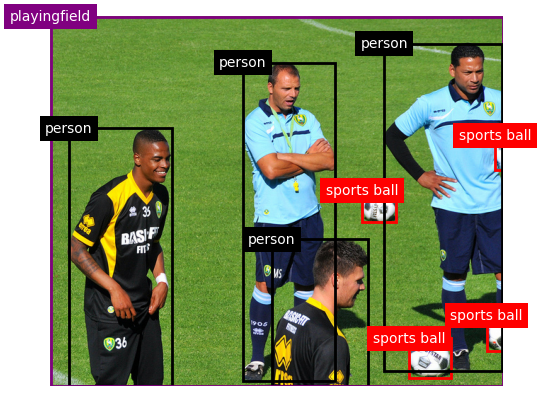

000000535202.jpg
000000277888.jpg
000000514060.jpg
000000091295.jpg
000000294749.jpg
000000393795.jpg
000000428872.jpg
000000125958.jpg


In [15]:
import random
for key in list(pano_json.keys())[:50]:
    print(key)
    if key != "000000416651.jpg":
        continue
    img = Image.open(os.path.join('playground/data/coco/train2017', key))
    fig = plt.imshow(img)
    pano_inf = os.path.join('playground/data/coco_segm_text/train/panoptic_inference', key)
    pano_seg = pano_json[key]
    segment_msg = {"person": {"color":"black", "number": -1}, "sports ball": {"color": "red", "number": -1}, "playingfield": {"color":"purple", "number": -1}}
    for seg in pano_seg:
        bbox = seg['bbox']
        category = seg['category']
        if category not in segment_msg:
            # random choose color
            color = random.choice(['red','blue','green','black','white','pink','purple'])
            segment_msg[category] = {"color": color, 'number': -1}
        segment_msg[category]['number'] += 1
        print(seg)
        # draw box with category 
        fig.axes.add_patch(bbox_to_rect(bbox,segment_msg[category]['color']))
        fig.axes.text(bbox_to_rect(bbox,segment_msg[category]['color']).xy[0],bbox_to_rect(bbox,segment_msg[category]['color']).xy[1],category,va='center', ha='center', fontsize=10, color='white',
                      bbox=dict(facecolor=segment_msg[category]['color'], lw=0))
    # plt.title('Panoptic Segmentation')
    plt.axis('off')
    plt.show()
    # plt.savefig('panoptic.png')


    